<a href="https://colab.research.google.com/github/du6293/project/blob/main/%EC%8B%AC%ED%99%9410__%ED%9A%8C%EA%B7%80_%ED%95%99%EC%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.선형회귀

## 사이킷런을 활용한 간단한 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
X=[[163],[179],[166],[169],[171]]  
# 선형회귀를 위한 입력데이터는 항상 2차원배열, 사이킷런이 다중회귀분석을 위해 설계
y=[54,63,57,56,58]

regr=LinearRegression()
regr.fit(X,y) #학습


LinearRegression()

In [ ]:
coef=regr.coef_                 #직선의 기울기, correlation coefficient
intercept=regr.intercept_       #직선의 절편
score=regr.score(X,y)           #학습된 직선이 데이터를 얼마나 잘 따르나,테스트&평가

print ("y={}*X+{:.2f}".format(coef.round(2),intercept))
print("데이터와 선형회귀 직선의 관계점수:{:.1%}".format(score))

y=[0.53]*X+-32.50
데이터와 선형회귀 직선의 관계점수:91.9%


## 데이터 시각화

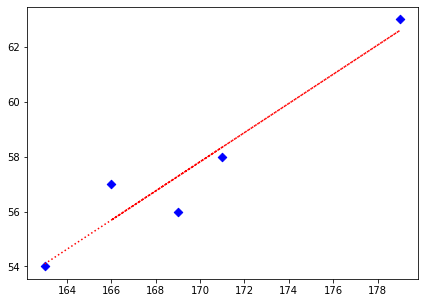

In [ ]:
import matplotlib.pyplot as plt

# 학습데이터와 값을 산포도로 그린다
plt.figure(figsize=(7,5))
plt.scatter(X,y,color="blue",marker='D')

# 학습데이터를 입력으로 하여 예측값을 계산한다.
y_pred=regr.predict(X) #예측

# 계산된 기울기와 y절편을 가지는 점선을 그려보자
plt.plot(X,y_pred,'r:')
plt.show()

In [ ]:
unseen=[[167]]
result=regr.predict(unseen)
print ("Joy의 키가 {}cm 이므로 몸무게는 {}kg으로 추정됨".format(unseen,result.round(1)))

Joy의 키가 [[167]]cm 이므로 몸무게는 [56.2]kg으로 추정됨


In [ ]:
# 2차원배열 만들기
x = [162,179,166,169,171]
a = np.array(x)
X = a[:,np.newaxis]
print(X)
X2 = np.array(x).reshape(-1, 1)
print(X2)

[[162]
 [179]
 [166]
 [169]
 [171]]
[[162]
 [179]
 [166]
 [169]
 [171]]


## 차원 증가

In [ ]:
regr=LinearRegression()

# 남자는 0, 여자는 1
X = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], \
     [178, 0], [172, 0], [163, 1], [162, 1], [171, 1], [162, 1], \
     [164, 1], [162, 1], [158, 1], [173, 1], ]    # 입력데이터를 2차원으로 만들어야 함 
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]     # y 값은 1차원 데이터

regr.fit(X, y)         # 학습
print('계수:',regr.coef_)
print('절편:',regr.intercept_)
print('점수:',regr.score(X,y))
print('호석이(키 170 남자)와 지호(키 164 여자)의 추정 몸무게 :', regr.predict([[179,0],[164,1]]).round(2))

계수: [ 0.74803397 -7.23030041]
절편: -61.227783894306384
점수: 0.8425933302504423
호석이(키 170 남자)와 지호(키 164 여자)의 추정 몸무게 : [72.67 54.22]


## 오차 함수

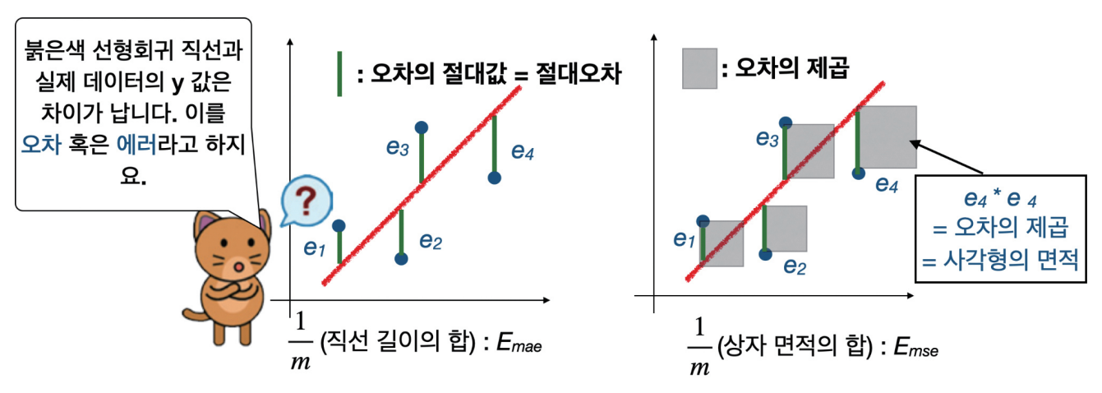

In [ ]:
import numpy as np

y = np.array([1.2, 2.4, 2.5, 4.6, 5.4]) #실제값
y_hat = np.array([1, 2, 3, 4, 5]) #예측값

diff = (y_hat - y) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = diff.sum() / len(y)
print('평균 제곱 오차 = ', e_mse)

평균 제곱 오차 =  0.19399999999999995


In [ ]:
from sklearn.metrics import mean_squared_error

print("평균제곱오차=", mean_squared_error(y_hat,y))

평균제곱오차= 0.19399999999999995


### [연습] 모델A와 모델B의 평균절대오차 (MAE), 평균제곱오차(MSE)를 각각 구하여라
```
모델 A = np.array([0.9, 1.3, 3.3, 3.8])
모델 B = np.array([0.5, 1.9, 3.4, 4.4])
정답값 y = np.array([1, 2, 3, 4])
```

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

A = np.array([0.9, 1.3, 3.3, 3.8])
B = np.array([0.5, 1.9, 3.4, 4.4])
y = np.array([1, 2, 3, 4])

print("A의 평균제곱오차=", mean_squared_error(A,y))
print("B의 평균제곱오차=", mean_squared_error(B,y))
print("A의 평균절대오차=", mean_absolute_error(A,y))
print("B의 평균절대오차=", mean_absolute_error(B,y))

A의 평균제곱오차= 0.15749999999999997
B의 평균제곱오차= 0.14500000000000005
A의 평균절대오차= 0.32499999999999996
B의 평균절대오차= 0.3500000000000001


## 경사 하강법과 학습의 원리

훈련 모델을 구현하기 위하여 모델에 설정되는 학습에 사용되는 파라미터를 하이퍼파라미터라고 한다. 

하이퍼파라미터에는 학습률, 훈련 반복 횟수, 가중치 초기화 값들이 될 수 있다

학습을 위해서는 전체 데이터를 모두 넣어서 에러를 구하는데 이렇게 전체 데이터를 한 번 사용하는 것을 1 에폭epoch이라고 한다.


### 가중치,편향 업데이트

In [ ]:
X=np.array([1,4.5,9,10,13])
y=np.array([0,0.2,2.5,5.4,7.3])
# 학습을 위해서는 전체 데이터를 한 번 사용하는 것을 1 에폭epoch
def gradientDescent(X, y, learning_rate, epoch):
    w,b=0,0                                 # w,b의 초기값을 0으로 설정
    
    for i in range(epoch):                  # 학습루프
        y_pred=w*X+b                        # 현재 w,b 를 이용한 작업 T
        error=y_pred-y                      # 성능척도 P
        w=w-learning_rate*(error*X).sum()   # 경험 E로 개선
        b=b-learning_rate*error.sum()

    print ('epoch={} error={} w={} b={}'.format(i+1, error.mean(), w.round(2),b.round(2)))  

In [ ]:
learning_rate,epoch=0.005,1000              # 학습률, 학습횟수(에폭)

gradientDescent(X, y, learning_rate, epoch)

epoch=1000 error=0.0009997871637833279 w=0.63 b=-1.65


In [ ]:
import matplotlib.pyplot as plt

def gradientDescent_plot(X, y, learning_rate, epoch):
    w,b=0,0                                 # w,b의 초기값을 0으로 설정
    y_error = list()

    for i in range(epoch):                  # 학습루프
        y_pred=w*X+b                        # 현재 w,b 를 이용한 작업 T
        error=y_pred-y                      # 성능척도 P
        w=w-learning_rate*(error*X).sum()   # 경험 E로 개선
        b=b-learning_rate*error.sum()
        y_error.append(error.mean())

    print ('epoch={} error={} w={} b={}'.format(i+1, error.mean(), w.round(2),b.round(2)))

    plt.figure(figsize=(12,4))
    plt.plot(y_error)
    plt.show()

epoch=1000 error=0.0009997871637833279 w=0.63 b=-1.65


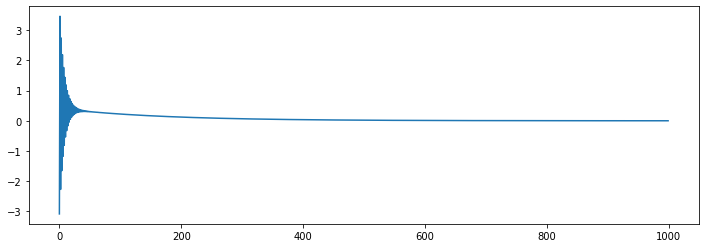

In [ ]:
learning_rate,epoch=0.005,1000   # 학습률, 학습횟수

gradientDescent_plot(X, y, learning_rate, epoch)

epoch=100 error=0.22483226216862792 w=0.54 b=-0.72


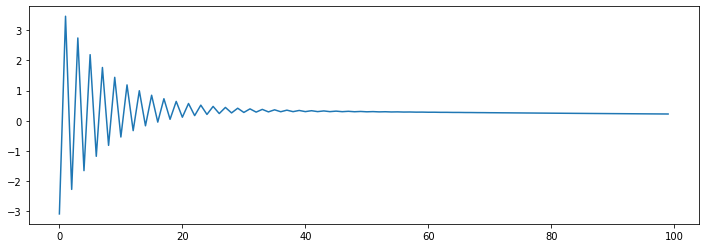

In [ ]:
learning_rate,epoch=0.005,100   # 학습률, 학습횟수

gradientDescent_plot(X, y, learning_rate, epoch)

### 학습

In [ ]:
X=np.array([1,4.5,9,10,13])
y=np.array([0,0.2,2.5,5.4,7.3])
regr=LinearRegression()
# np.newaxis는 차원을 늘릴 때 사용. 1차원 X가 2차원(6,1)이 됨
X=X[:,np.newaxis]       
regr.fit(X,y)

print('w=',regr.coef_.round(2),', b=',regr.intercept_.round(2))

w= [0.63] , b= -1.65


### 예측

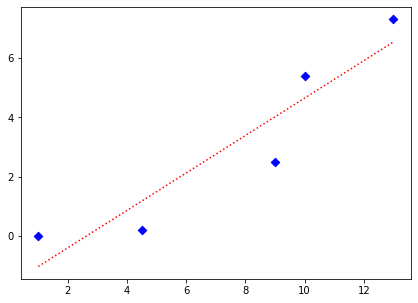

In [ ]:
X=np.array([1,4.5,9,10,13])
y=np.array([0,0.2,2.5,5.4,7.3])
plt.figure(figsize=(7,5))
plt.scatter(X,y,color='blue',marker='D')

y_pred=0.63*X-1.65
plt.plot(X,y_pred,'r:')
plt.show()

### 학습률(learning rate) 조정

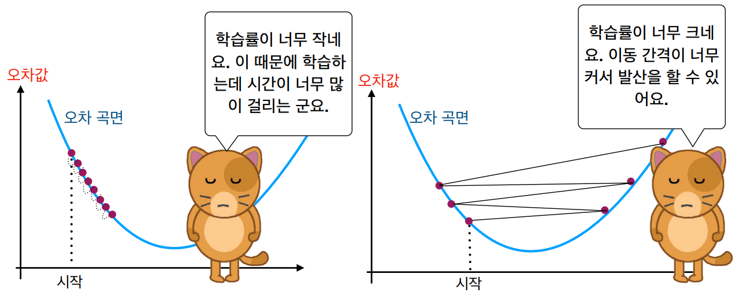

In [ ]:
X=np.array([1,4.5,9,10,13])
y=np.array([0,0.2,2.5,5.4,7.3])

def gradientDescent(X, y, learning_rate, epoch):
    w,b=0,0                                 # w,b의 초기값을 0으로 설정
    
    for i in range(epoch):                  # 학습루프
        y_pred=w*X+b                        # 현재 w,b 를 이용한 작업 T
        error=y_pred-y                      # 성능척도 P
        w=w-learning_rate*(error*X).sum()   # 경험 E로 개선
        b=b-learning_rate*error.sum()

    print ('w=',w.round(2),'b=',b.round(2))

하이퍼 파라미터 중 하나인 학습률(learning rate)을 0.00001과 같이 아주 작게 하면 어떻게 될까?

In [ ]:
learning_rate,epoch=0.0001,1000             # 학습률, 학습횟수

gradientDescent(X, y, learning_rate, epoch)

# 결론:
# 경사를 타고 내려오는 간격이 너무 작아서 정답에 제대로 수렴하지 못한다
# epoch를 아주 크게 주면 언젠가는 수렴할 수도 있지만 학습시간이 너무 많이 걸린다

w= 0.48 b= -0.15


하이퍼 파라미터 중 하나인 학습률(learning rate)을 1.0과 같이 크게 하면 어떻게 될까?

epoch=1000 error=nan w=nan b=nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


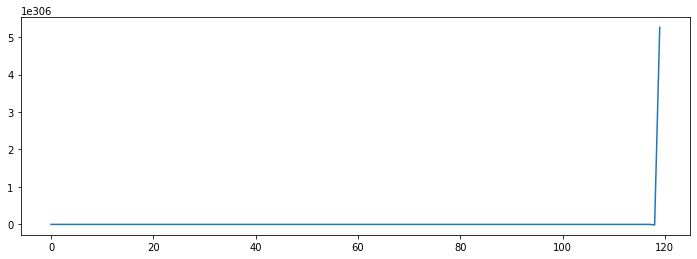

In [ ]:
learning_rate,epoch=1.0,1000                # 학습률, 학습횟수

gradientDescent_plot(X, y, learning_rate, epoch)

# 결론:
# 경사를 따라 이동하는 간격이 너무 커서 발산을 하게 되어 제대로 된 w와 b를 구할 수 없다

## [실습] flights 데이터로 항공기 승객수를 예측하시오

다음과 같이 시본에서 제공하는 flights 데이터 셋을 읽어서 flights 데이터 셋의 shape을 출력한 후, head() 메소드로 데이터를 살펴보자.
```
flights 데이터의 shape : (144, 3)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
```

### (1) 데이터 가져오기

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  

# seaborn에서 제공하는 flights 데이터세트를 로딩
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.shape

(144, 3)

### (2) 연도별 이용객수 확인 : 연도 값을 x 축으로하고, 연간 승객의 수를 y 축으로 하여

In [ ]:
flights_df = flights.groupby('year').sum()
flights_df

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


### (3) 데이터 시각화(연도-승객수) : 연도별 항공기 승객의 증가 추이를 scatter() 메소드를 이용하여 시각화한다

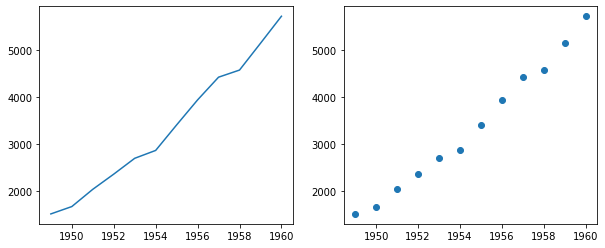

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(flights.groupby('year').sum())
plt.subplot(122)
plt.scatter(flights.groupby('year').sum().index, flights.groupby('year').sum().passengers)

plt.show()

### (4) 선형회귀

연도와 항공기 승객의 수 사이에는 어떤 상관관계가 있을까? 선형회귀 분석을 통해서 선형회귀 모델의 계수와 절편을 구하여라. 마지막으로 이 선형회귀 모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측 점수를 출력해 보자(힌트 : 선형회귀 모델의 입력값 X, y는 각각 연도와 승객의 수로 하되, X는 2차원으로 변환을 해야 한다).

In [ ]:
X = flights_df.index.values #연도
X = X[:, np.newaxis]
#print(X)
y = flights_df['passengers'].values

regr = LinearRegression()
regr.fit(X, y) #학습

coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("선형회귀 모델의 계수: {}".format(coef))
print("선형회귀 모델의 절편: {:.2f}".format(intercept))
print("데이터와 선형회귀 점수: {:.1%}".format(score))

y = [383.09]* X + -745380.76
선형회귀 모델의 계수: [383.08741259]
선형회귀 모델의 절편: -745380.76
데이터와 선형회귀 점수: 98.7%


### (5) 예측 및 시각화

산점도 그래프와 선형회귀 직선을 한 그래프 위에 표시

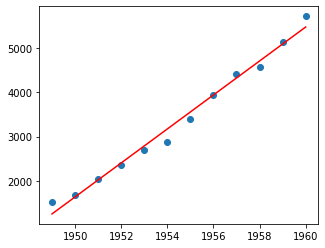

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.scatter(X, y)
plt.plot(X, regr.predict(X), color='r')
plt.show()

# 2.다중 회귀

## [실습] 기대수명 예측하기

***항이 여러 개일 경우에도 LinearRegression이 가능하다!!***

- 세계보건기구(World Health Organization, WHO)에서 발표한 나라별 기대수명 데이터
- 2000년~2015년 사이의 나라별 기대수명, 보건 예산, 질병 통계, 비만도 등
- 출처: Kaggle https://www.kaggle.com/kumarajarshi/life-expectancy-who/home


- Country: 국가명
- Year: 2000년부터 2015년까지의 연도
- Status: Developed(선진국) or Developing(개발도상국) status
- Life expectancy: 기대수명(나이)
- Adult Mortality: 15세~60세사이의 성인 1000명당 사망자수
- infant deaths: 유아 1000명당 사망자수
- Alcohol: 1인당 알콜 소비량
- percentage expenditure: GDP 대비 보건 예산 지출비율(%)
- Hepatitis B: 1세 아동의 B형 간염 예방 접종률(%)
-Measles: 인구 1000명당 홍역 예방 접종률(%)
- BMI: 전인구 평균 체질량 지수
- Under-five deaths: 5세이하 아동 1000명당 사망자수
- Polio: 1세 아동의 소아마지 면역률(%)
- Total expenditure: 정부 총예산 대비 보건 분야 예산(%)
- Diphtheria: 1세 아동의 디프테리아 예방 접종률(%)
- HIV/AIDS: HIV/AIDS 감염상태로 태어남 0-4세 인구 1000명당 사망자수
- GDP: 1인당 GDP
- Population: 국가 총인구
- thinness 1-19 years: 1-19 세 청소년 중 저체중 비율
- thinness 5-9 years:5-9세 사이의 아동의 저체중 비율
Income composition of resources: 소득 구성에 따른 인간개발지수
- Schooling: 학교 재학 연수

### (1) 데이터 가져오기

In [ ]:
import pandas as pd

file='life_expectancy.csv'

life=pd.read_csv(file)
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### (2) 데이터 살펴보기

기술지표 살펴보기: describe()

In [ ]:
life.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


컬럼명 살펴보기: life.columns

In [ ]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### (3) 특성 추출
기대수명과 상관도 높은 데이터를 찾아보자: life.corr()

In [ ]:
life.corr().round(3)

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000,0.170,-0.079,-0.037,-0.053,0.031,0.104,-0.082,0.109,-0.043,0.094,0.091,0.134,-0.140,0.102,0.017,-0.048,-0.051,0.243,0.209
Life expectancy,0.170,1.000,-0.696,-0.197,0.405,0.382,0.257,-0.158,0.568,-0.223,0.466,0.218,0.479,-0.557,0.461,-0.022,-0.477,-0.472,0.725,0.752
Adult mortality,-0.079,-0.696,1.000,0.079,-0.196,-0.243,-0.162,0.031,-0.387,0.094,-0.275,-0.115,-0.275,0.524,-0.296,-0.014,0.303,0.308,-0.458,-0.455
Infant deaths,-0.037,-0.197,0.079,1.000,-0.116,-0.086,-0.224,0.501,-0.227,0.997,-0.171,-0.129,-0.175,0.025,-0.108,0.557,0.466,0.471,-0.145,-0.194
Alcohol,-0.053,0.405,-0.196,-0.116,1.000,0.341,0.088,-0.052,0.330,-0.112,0.222,0.297,0.222,-0.049,0.355,-0.035,-0.429,-0.417,0.450,0.547
Percentage expenditure,0.031,0.382,-0.243,-0.086,0.341,1.000,0.016,-0.057,0.229,-0.088,0.147,0.174,0.144,-0.098,0.899,-0.026,-0.251,-0.253,0.382,0.390
Hepatitis B,0.104,0.257,-0.162,-0.224,0.088,0.016,1.000,-0.121,0.150,-0.233,0.486,0.058,0.611,-0.113,0.084,-0.123,-0.120,-0.125,0.200,0.231
Measles,-0.082,-0.158,0.031,0.501,-0.052,-0.057,-0.121,1.000,-0.176,0.508,-0.136,-0.106,-0.142,0.031,-0.076,0.266,0.225,0.221,-0.130,-0.137
BMI,0.109,0.568,-0.387,-0.227,0.330,0.229,0.150,-0.176,1.000,-0.238,0.285,0.243,0.283,-0.244,0.302,-0.072,-0.532,-0.539,0.509,0.547
Under-five deaths,-0.043,-0.223,0.094,0.997,-0.112,-0.088,-0.233,0.508,-0.238,1.000,-0.189,-0.130,-0.196,0.038,-0.112,0.544,0.468,0.472,-0.163,-0.209


수치는 눈에 잘 안 들어오니 시각화해서 살펴보자: life.corr(), sns.heatmap()

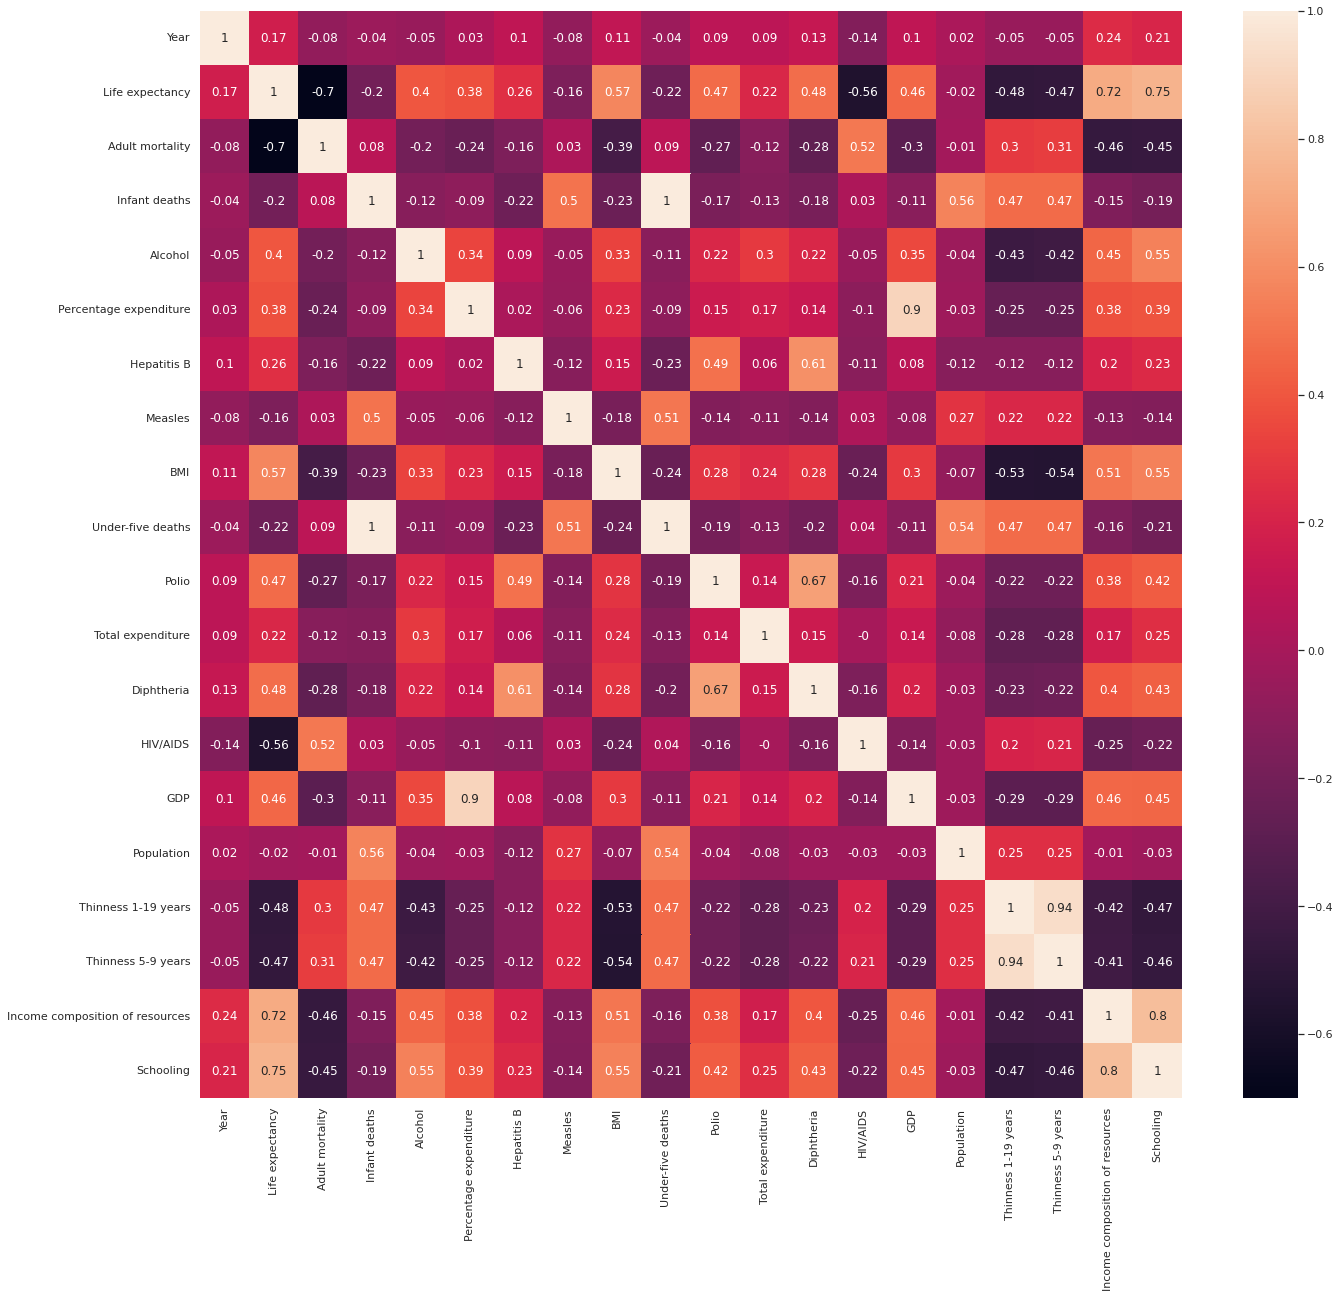

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(22,20)})
correlation_matrix=life.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

기대수명과의 상관도만 추려보자: life.corr()

In [ ]:
life.corr().round(2)['Life expectancy']

# 결론:
# Year, Population은 상관도가 낮고
# Adult mortality, Schooling은 상관도가 높다

Year                               0.17
Life expectancy                    1.00
Adult mortality                   -0.70
Infant deaths                     -0.20
Alcohol                            0.40
Percentage expenditure             0.38
Hepatitis B                        0.26
Measles                           -0.16
BMI                                0.57
Under-five deaths                 -0.22
Polio                              0.47
Total expenditure                  0.22
Diphtheria                         0.48
HIV/AIDS                          -0.56
GDP                                0.46
Population                        -0.02
Thinness 1-19 years               -0.48
Thinness 5-9 years                -0.47
Income composition of resources    0.72
Schooling                          0.75
Name: Life expectancy, dtype: float64

상관도의 절대값이 높은 순으로 정렬하고, 그 중에서 상위 5개를 뽑아 본다: sort_values(ascending=False)

In [ ]:
import numpy as np

c=np.abs(life.corr().round(2)['Life expectancy'])
print(c.sort_values(ascending=False)[1:6])  # 상위 5개
# 가장 상관도가 높은 0번은 Life expectancy이므로 제외함
# 학교 재학 년수, 소득구성에 따른 인간개발지수, 15~60세 성인 1000명 당 사망자수, BMI ....

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Name: Life expectancy, dtype: float64


상관도의 절대값이 낮은 순으로 정렬하고, 그 중에서 상위 5개를 뽑아 본다: sort_values(ascending=True)

In [ ]:
print(c.sort_values(ascending=True)[0:5])   # 하위 5개

# 결론:
# 데이터가 보여주는 결과가 초기 가정과 다를 수 있다
# Measles(홍역 예방접종률)과 Infant deaths(유아 1000명당 사망자수)가 기대수명에 영향을
# 줄 것 같지만 상관도는 낮게 나옴

Population           0.02
Measles              0.16
Year                 0.17
Infant deaths        0.20
Total expenditure    0.22
Name: Life expectancy, dtype: float64


기대수명과 상관도가 높은 5개의 특성에 대해서 pairplot을 그려보자: sns.pairplot()

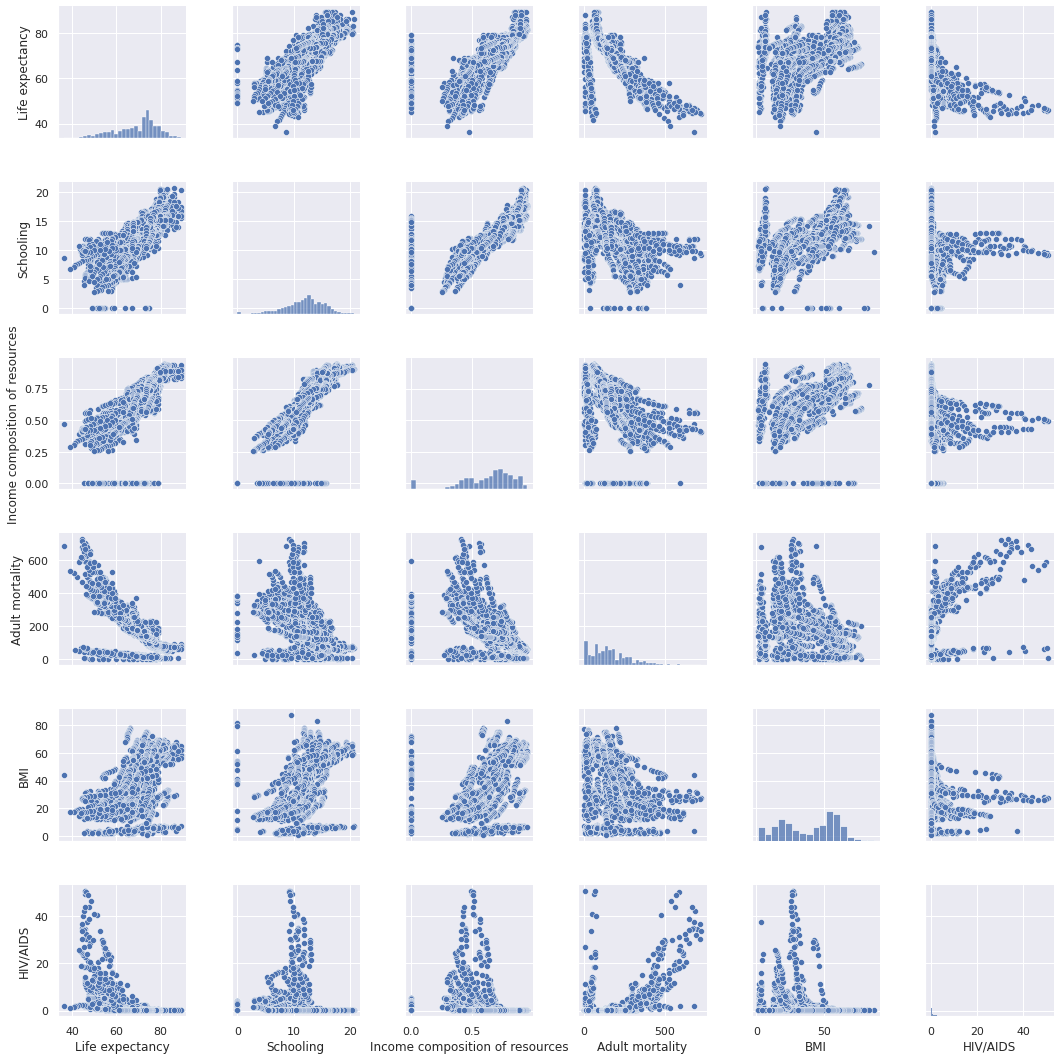

In [ ]:
highcorr = c.sort_values(ascending=False)[0:6].index # 기대수명+상위5개, 총 6개

sns.pairplot(life[highcorr])
plt.show()

# 결론:
# pairplot의 결과도 Schooling(학교 재학 년수), Income composition of resources(소득구성)이
# 대각선 모양의 분포를 가지는 것을 볼 수 있다

기대수명과 다른 속성과의 상관도 절대값의 크기에 따라 막대차트를 그려보자. (상관계수의 절대값이 높은 순서에 따라)

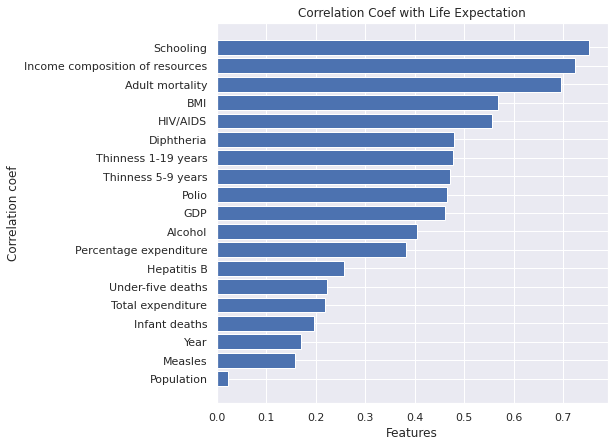

In [ ]:
c=life.corr()['Life expectancy']
c=np.abs(c)
c.sort_values(ascending=True, inplace=True) # 상관도 오름차순으로 정리
c=c[:-1]                                    # Life expectancy는 제거

plt.figure(figsize=(7,7))
plt.barh(c.index,c.values)

plt.title('Correlation Coef with Life Expectation')
plt.xlabel('Features')
plt.ylabel('Correlation coef')
plt.show()

### (4) 결측치 처리
상관도가 높은 5가지 특성에 대해 결측치를 살펴보자: isna().sum()

In [ ]:
life[highcorr[1:]].isna().sum()

Schooling                          163
Income composition of resources    167
Adult mortality                     10
BMI                                 34
HIV/AIDS                             0
dtype: int64

결측데이터는 삭제한다: dropna()

In [ ]:
life.dropna(inplace=True)

### (5) 선형회귀 모델 구성 및 평가

In [ ]:
X=life[highcorr[1:]]
y=life['Life expectancy']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# test_size의 default는 0.25입니다. 데이터가 충분히 많으면 이 비율을 줄여도 됨
# 입력데이터와 레이블을 랜덤하게 섞어서 일부는 학습데이터, 일부는 테스트 데이터로 나눔
#호출할때 마다 무작위로 섞음 최종성능평가 정화도에 약간 차이가 날 수 있다.
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # 20%는 테스트데이터로 사용
regr=LinearRegression()
regr.fit(X_train,y_train)
print('선형회귀모델의 점수=', regr.score(X_test,y_test).round(3))

# 결론:
# 0.8xx로 좋은 점수가 나온다

선형회귀모델의 점수= 0.828


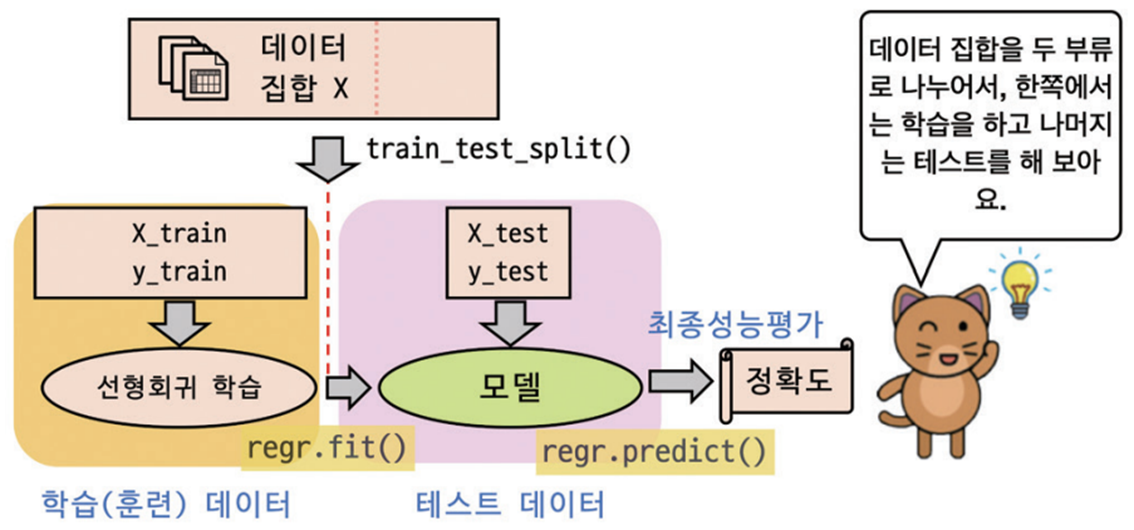

Country, Year, Status를 제외한 모든 속성을 활용해 선형회귀모델 작성하고 점수를 확인합니다

전역적 탐색법: 속성 변수들의 가능한 모든 조합들로부터 최적의 모형을 찾는 방법.

전진 선택법 : 기여도(상관도)가 높은 유의한 속성 변수부터 하나씩 추가하는 방법.

후방 소거법: 전체 속성들 중에서 기여도가 가장 낮은 속성부터 하나씩 제거하는 방법

In [ ]:
import pandas as pd

file='life_expectancy.csv'
life=pd.read_csv(file)

life.dropna(inplace=True)   #결측값 제거

X=life[life.columns[4:]]
#print(X)
y=life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
regr=LinearRegression()
regr.fit(X_train,y_train)
print('선형회귀모델의 점수=', regr.score(X_test,y_test).round(3))

# 결론:
# 특성을 18개 사용했으나 5개 사용했을 때와 비교해서 점수가 그다지 증가하지 않음
# "Garbage-in Garbage-out: 쓸모없는 데이터가 입력으로 들어가면 쓸모없는 결과만 나올 뿐" 
# 특성에 대한 분석을 우선적으로 한 후에 이 특성을 바탕으로 선형 회귀 모델을 만들자

선형회귀모델의 점수= 0.825


## 다항 회귀
데이터의 분포가 비선형일 경우 다항회귀모델을 사용하자

### 1.데이터 만들기

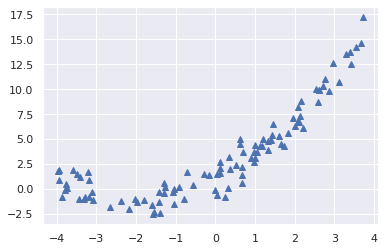

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m=100                               # 생성할 데이터의 개수
X=8*np.random.rand(m,1)-4           # 평균이 0이고 -4에서 4까지 분포하는 랜덤값. m행1열 2차원
y=0.5*X**2+2*X+1+np.random.randn(m,1)  

plt.figure(figsize=(6,4))
plt.plot(X,y,"b^")
plt.show()

### 2.선형회귀모델

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr=LinearRegression()

regr.fit(X,y)
print('선형회귀모델의 점수=',regr.score(X,y).round(3))
print('선형회귀모델의 계수와 절편=', regr.coef_,regr.intercept_)

선형회귀모델의 점수= 0.68
선형회귀모델의 계수와 절편= [[1.68216858]] [3.45751911]


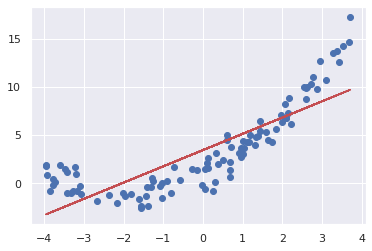

In [ ]:
y_predict=regr.predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X.flatten(),y_predict,color='r')
plt.show()

# 결론:
# 2차 방정식 모양의 데이터 분포인데 1차 방정식으로 모델링하니 오차가 많이 발생함. 점수 낮음

### 3.다항회귀모델

In [ ]:
# PolynomialFeatures() 연습 임의의 차수를 가지는 다항을 추가하는 기능

from sklearn.preprocessing import PolynomialFeatures

# 간단한 샘플데이터 생성
X=np.arange(2).reshape(-1,1)
print('샘플데이터:\n', X)

# X에 대해 다항 특성 추가. 인수를 안 주면 기본으로 2개 생성
poly=PolynomialFeatures()
X=poly.fit_transform(X)
print('특성이 추가된 데이터:\n', X)

# 특성의 이름 출력
print('특성 이름:\n', poly.get_feature_names_out())

# 특성 '1'은 바이어스(편향)
# 편향을 만들지 않으려면 PolynomicalFeatures(include_bias=False)

샘플데이터:
 [[0]
 [1]]
특성이 추가된 데이터:
 [[1. 0. 0.]
 [1. 1. 1.]]
특성 이름:
 ['1' 'x0' 'x0^2']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

m = 100 
X = 8 * np.random.rand(m, 1) - 4 
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

# X에 대해 다항 특성 2개 추가. 편향은 생성하지 않음
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
#print(X_poly )
print('특성 이름:', poly_features.get_feature_names_out())

# 다항회귀
regr = LinearRegression()
regr.fit(X_poly, y)

print('다항회귀모델의 점수=',regr.score(X_poly,y).round(3))
print('다항선형회귀모델의 계수=', regr.coef_, ' 절편=', regr.intercept_)

# 결론:
# 항 '1', 'x0^2'이 추가된 모델의 점수가 훨씬 높다

특성 이름: ['x0' 'x0^2']
다항회귀모델의 점수= 0.968
다항선형회귀모델의 계수= [[2.03316551 0.51406043]]  절편= [1.14234091]


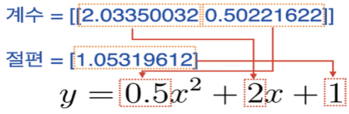

### 4.예측

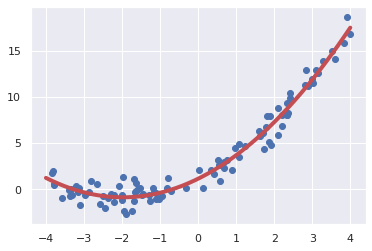

In [ ]:
# -4에서 4사이의 domain데이터 생성
domain = np.linspace(-4, 4, 50).reshape(-1, 1)

# domain데이터에 2차 다항 특성을 추가한 domain_poly 생성
domain_poly = poly_features.fit_transform(domain)

# 예측
y_predict = regr.predict(domain_poly)

# 시각화
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.plot(domain, y_predict, color='r', linewidth=4)
plt.show()

# 결론:
# 다항회귀분석이 2차방정식 형태인 입력데이터의 분포를 잘 예측한다

## [실습] 3차 방정식 만들고 다항 회귀 모델을 이용해 예측하시오
```
데이터의 개수는 100개
X의 범위 [-4, 4]
y=0.5*x^3 + 0.5*x^2 + x + 3
y값에 정규분포를 따르는 난수가 들어가도록 한다
```



### (1) 데이터 생성 및 시각화

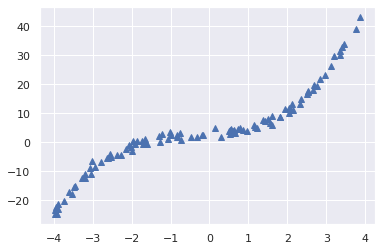

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m=100                               # 생성할 데이터의 개수
X=8*np.random.rand(m,1)-4           # 평균이 0이고 -4에서 4까지 분포하는 랜덤값. m행1열 2차원
y=0.5*X**3 + 0.5*X**2 + X + 3+np.random.randn(m,1)  

plt.figure(figsize=(6,4))
plt.plot(X,y,"b^")
plt.show()

### (2) 항 추가하기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

### (3) 다항회귀

In [ ]:
regr = LinearRegression()
regr.fit(X_poly, y)

print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_)
print('다항 회귀 모델의 절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.995
다항 회귀 모델의 계수 = [[1.06493488 0.52166102 0.49700156]]
다항 회귀 모델의 절편 = [2.83490572]


### (4) 예측 및 시각화

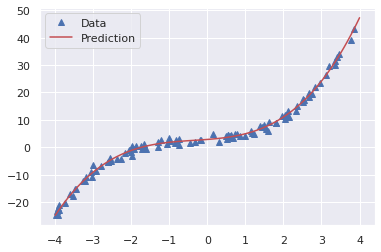

In [ ]:
# 예측
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

# 시각화
plt.figure(figsize=(6,4))
plt.plot(X, y, "b^", label='Data')
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.legend()
plt.show()

# [실습] 당뇨병 예측

## (1) 데이터 가져오기 :당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 

**10개의 특징을 가진 442명의 환자들의 1년 후 당뇨수치**

1) 이 데이터를 70%의 훈련용 데이터와 30%의 테스트용 데이터로 나누도록 하자.

2)이 데이터에서 체질량지수 (BMI)속성을 이용하여 당뇨수치를 예측하는 선형회귀모델을 만들자. 

3) 2)번 문제에서 만든 선형회귀모델의 예측점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print(type(diabetes.data), diabetes.data.shape)

<class 'numpy.ndarray'> (442, 10)


In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [ ]:
# 10개의 특징을 가진 442명의 환자들의 1년 후 당뇨수치가 얼마나 진행되었는가
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
# 당뇨환자의 검사수치 10개와 레이블이 있는 데이터
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


필요한 라이브러리 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## (2) 당뇨수치 표준화 ([25 ~ 364]=>[-1 ~ 1])

Scaler 클래스의 사용 방법

1. 클래스 객체 생성
2. fit() 메서드와 트레이닝 데이터를 사용하여 변환 계수 추정
3. transform() 메서드를 사용하여 실제로 자료를 변환
4. 또는 fit_transform() 메서드를 사용하여 계수 추정과 자료 변환을 동시에 실행

In [ ]:
ss = StandardScaler()   
# 표준화: 표준 스케일러로 스케일링함: feature를 리스케일링 하여 feature의 평균이 0 분산이 1이 되게 만들어줌

t = diabetes_y.reshape(-1, 1)
diabetes_y_new = ss.fit_transform(t)
# fit_transform()메서드는 학습을 위한 train data에 사용하고 
# test data에서는 transform()메서드만 사용합니다. 
# 만약 test data에 대해서도 fit_transform()메서드를 사용하게 되면 
# 모델은 test data에 대해서도 학습을 하는 꼴이 되어 일반화된 성능을 기대할 수 없게 됩니다

print('표준화 이전 혈당값 \n', diabetes_y[:5])
print('표준화 이후 혈당값 \n', diabetes_y_new[:5].flatten())

표준화 이전 혈당값 
 [151.  75. 141. 206. 135.]
표준화 이후 혈당값 
 [-0.01471948 -1.00165882 -0.14457991  0.69951294 -0.22249618]


## (3) 데이터 분리(7:3) : split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y_new, test_size = 0.3)

## (4-1) 전체 속성으로 학습

In [ ]:
regr = LinearRegression() 
regr.fit(X_train, y_train)

print('[전체 속성으로 학습한 결과]')
score = regr.score(X_train, y_train) 
print('  훈련 데이터의 점수   : {:5.2%}'.format(score))
score = regr.score(X_test, y_test) 
print('  테스트 데이터의 점수 : {:5.2%}'.format(score))

[전체 속성으로 학습한 결과]
  훈련 데이터의 점수   : 50.10%
  테스트 데이터의 점수 : 54.70%


## (4-2) 체질량 지수(BMI) 속성을 이용하여 당뇨수치를 예측하는 선형 회귀 모델을 만들자.

In [ ]:
# 학습 데이터와 테스트 데이터를 분리한다.
X_train, X_test, y_train, y_test = train_test_split(diabetes_X[:, 2,np.newaxis],
                                                    diabetes_y_new,
                                                    test_size = .3)
regr = LinearRegression() 
regr.fit(X_train, y_train)

print(X_train.shape)
print(X_train[:4])



(309, 1)
[[-0.0730303 ]
 [ 0.00672779]
 [-0.02560657]
 [ 0.00026092]]


In [ ]:

print('[BMI 속성으로 학습한 결과]')
score = regr.score(X_train, y_train) 
print('  훈련 데이터의 점수   : {:5.2%}'.format(score))
score = regr.score(X_test, y_test) 
print('  테스트 데이터의 점수 : {:5.2%}'.format(score))

[BMI 속성으로 학습한 결과]
  훈련 데이터의 점수   : 34.32%
  테스트 데이터의 점수 : 34.40%


## (5) 당뇨 수치 값과 각 속성들의 상관관계를 구해보자. 

이를 바탕으로 상관도가 높은 3개의 속성을 사용하여 모델을 만들고 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn import datasets

# 학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size = .3)
regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

표준화 이전 혈당값 
 [151.  75. 141. 206. 135.]
표준화 이후 혈당값 
 [-0.01471948 -1.00165882 -0.14457991  0.69951294 -0.22249618]
diabetes[:5] = [[-0.01471948  0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235
  -0.03482076 -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-1.00165882 -0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872
  -0.01916334  0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [-0.14457991  0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945
  -0.03419447 -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [ 0.69951294 -0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057
   0.02499059 -0.03603757  0.03430886  0.02269202 -0.00936191]
 [-0.22249618  0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485
   0.01559614  0.00814208 -0.00259226 -0.03199144 -0.04664087]]
인덱스 상관계수
3    0.59
9    0.57
4    0.44
Name: 0, dtype: float64


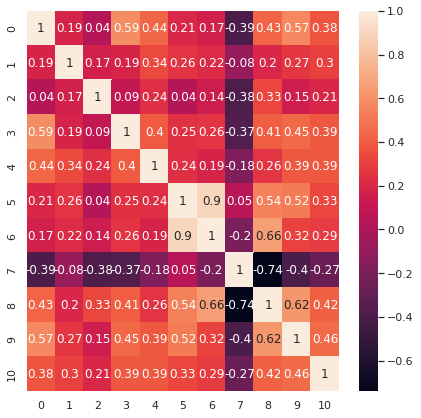

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
ss = StandardScaler()
t = diabetes_y
t = t.reshape(-1, 1)
diabetes_y_new = ss.fit_transform(t)
print('표준화 이전 혈당값 \n', diabetes_y[:5])
print('표준화 이후 혈당값 \n', diabetes_y_new[:5].flatten())
diabetes = np.append(diabetes_y_new, diabetes_X, axis = 1)
print('diabetes[:5] =', diabetes[:5])
df = pd.DataFrame(data = diabetes)
corr_mat = df.corr().round(2)
plt.figure(figsize=(7,7))
sns.heatmap(data=corr_mat, annot=True)
c = df.corr().round(2)[0]
c = np.abs(c) 
# 상관계수의 절대값을 취한다 
print('인덱스 상관계수')
print(c.sort_values(ascending=False)[1:4])
#corr = np.corrcoef(diabetes)
#print(corr.shape)
#plt.imshow(corr)

In [ ]:
print('상관계수가 높은 상위 3개')
print(c.sort_values(ascending=False)[1:4])

상관계수가 높은 상위 3개
3    0.59
9    0.57
4    0.44
Name: 0, dtype: float64


In [ ]:
X = df.iloc[:, [3, 9, 4]]
y = df.iloc[:, [0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

regr = LinearRegression() 
regr.fit(X_train, y_train)


LinearRegression()

In [ ]:
print('==== 상관도가 높은 3개 속성을 학습에 사용한 결과 ====')
score = regr.score(X_train, y_train) 
print('훈련 데이터의 점수 :', score)
score = regr.score(X_test, y_test) 
print('테스트 데이터의 점수 :', score)

==== 상관도가 높은 3개 속성을 학습에 사용한 결과 ====
훈련 데이터의 점수 : 0.49288861833560615
테스트 데이터의 점수 : 0.44485950500665306


In [ ]:
print(np.round(diabetes.data, 2))


[[-0.01  0.04  0.05 ... -0.    0.02 -0.02]
 [-1.   -0.   -0.04 ... -0.04 -0.07 -0.09]
 [-0.14  0.09  0.05 ... -0.    0.   -0.03]
 ...
 [-0.26  0.04  0.05 ... -0.01 -0.05  0.02]
 [ 0.88 -0.05 -0.04 ...  0.03  0.04 -0.03]
 [-1.24 -0.05 -0.04 ... -0.04 -0.    0.  ]]


In [ ]:
corr = np.corrcoef(diabetes.data).round(decimals=2)
corr

array([[ 1.  ,  0.1 ,  0.7 , ...,  0.33, -0.16, -0.  ],
       [ 0.1 ,  1.  ,  0.72, ...,  0.91, -0.99,  0.99],
       [ 0.7 ,  0.72,  1.  , ...,  0.84, -0.76,  0.64],
       ...,
       [ 0.33,  0.91,  0.84, ...,  1.  , -0.96,  0.88],
       [-0.16, -0.99, -0.76, ..., -0.96,  1.  , -0.98],
       [-0.  ,  0.99,  0.64, ...,  0.88, -0.98,  1.  ]])

In [ ]:
print(corr.shape)

(442, 442)


##(6) diabetes 데이터의 모든 속성을 사용하여 모델을 만들고 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 
diabetes = datasets.load_diabetes()
# 학습 데이터와 테스트 데이터를 분리한다.
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size = .3)
regr = LinearRegression() 
regr.fit(X_train, y_train)

print('==== 전체 속성을 학습에 사용한 결과 ====')
score = regr.score(X_train, y_train) 
print('훈련 데이터의 점수 :', score)
score = regr.score(X_test, y_test) 
print('테스트 데이터의 점수 :', score)

==== 전체 속성을 학습에 사용한 결과 ====
훈련 데이터의 점수 : 0.5518453346342811
테스트 데이터의 점수 : 0.41493635323115174


# 3.과대적합

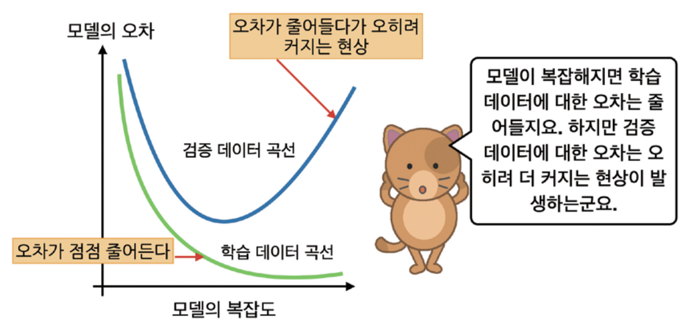

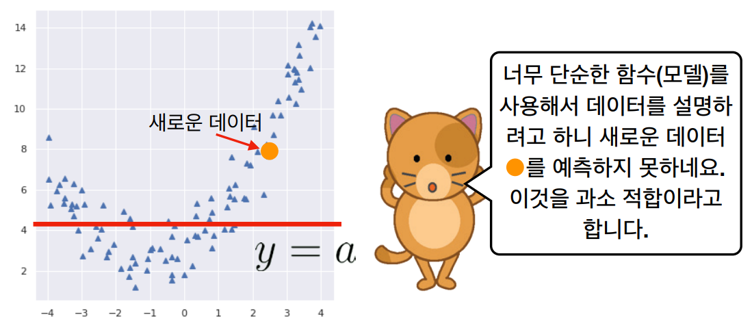

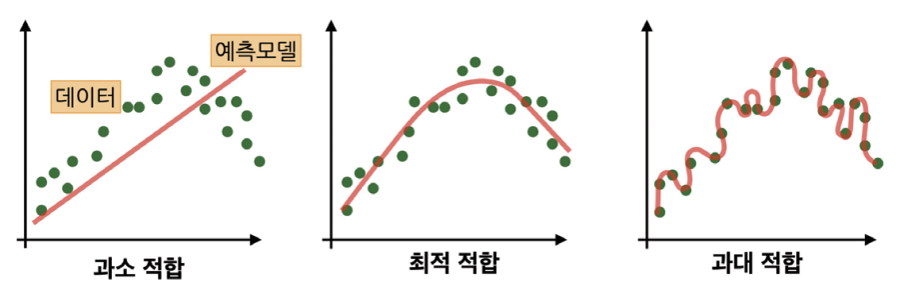

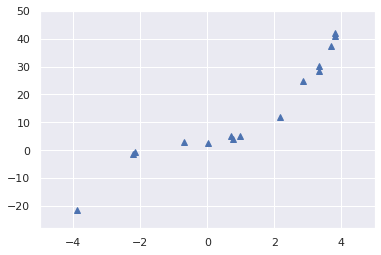

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

m = 20                          # 생성할 데이터의 개수
X = 8*np.random.rand(m,1)-4     # 평균이 0이고 -4에서 4까지 분포하는 랜덤값. m행1열 2차원
y = 0.5*X**3 + 0.5*X**2 + X + 3+np.random.randn(m,1)  

# test_size의 default는 0.25입니다
X_train, X_test,y_train,y_test=train_test_split(X,y)

plt.figure(figsize=(6,4))
plt.xlim(-5, 5)
plt.ylim(-28, 50)
plt.plot(X_train, y_train, "b^")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=20, include_bias=False)

X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)

print("다항 회귀 모델의 점수 = ", regr.score(X_poly, y_train).round(3))
print("다항 회귀 모델 계수 = ", regr.coef_)
print("절편 = ", regr.intercept_)

다항 회귀 모델의 점수 =  1.0
다항 회귀 모델 계수 =  [[ 2.65760212e+01  3.64957517e+00 -4.79121643e+01 -1.49239699e+01
  -1.12629845e+01  2.01094850e+01  2.02554479e+01  2.47442736e+01
   4.83830531e-01 -6.82037758e+00 -2.62746202e+01  1.12171704e+01
   9.32090419e+00 -5.44846559e+00 -4.54669512e-01  7.76107763e-01
  -1.14602784e-01 -2.23837158e-02  7.34589060e-03 -5.39569716e-04]]
절편 =  [2.13964285]


In [ ]:
#테스트 데이터를 다항회귀 모델의 입력으로 주고 예측점수를 구해보자
X_poly = poly_features.fit_transform(X_test)
print("다항 회귀 모델의 점수 = ", regr.score(X_poly, y_test))

다항 회귀 모델의 점수 =  -694.5031235173163


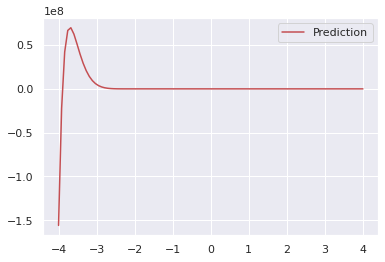

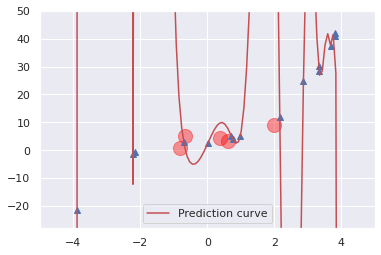

In [ ]:
# 예측
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

# 시각화
plt.figure(figsize=(6,4))

plt.plot(X_new, y_new, "r-", label="Prediction")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.xlim(-5, 5)
plt.ylim(-28, 50)
plt.plot(X_train, y_train, "b^")
plt.scatter(X_test, y_test, c='red', s=200, alpha=0.4)
plt.plot(X_new, y_new, "r-", label="Prediction curve")
plt.legend()
plt.show()

## 과소적합, 과대적합, 규제

보고 있는 데이터 모두에 대해 최선이 되려는 욕심을 버리는 것
모델이 마음대로 움직이지 못하게 제한하는 것 / 

모델의 학습을 오히려 방해하는 방식으로 일반화 능력을 높이는 방법. 

모델의 자유도를 제한 모델에 규제를 가하는 대표적인 방법 : 릿지 회귀, 라쏘 회귀, 엘라스틱 넷

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 20개의 데이터를 생성하자
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 구분하자
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 다항 특성이 20개가 되도록 하자
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터의 점수 =', regr.score(X_train_pl, y_train).round(3))
print('테스트 데이터의 점수 =', regr.score(X_test_pl, y_test).round(3))

훈련 데이터의 점수 = 1.0
테스트 데이터의 점수 = -6142780234.944


## 릿지회귀와 alpha값

In [ ]:
### 규제를 추가해 보자 ##
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 규제가 있는 모델은 스케일러로 변환을 해야 함
ss.fit(X_train_pl)
train_scaled, test_scaled = ss.transform(X_train_pl),ss.transform(X_test_pl)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test) 

### 릿지 회귀 ###
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)
print('훈련 데이터의 점수 =', ridge.score(train_scaled, y_train_scaled))
print('테스트 데이터의 점수 =', ridge.score(test_scaled, y_test_scaled))

훈련 데이터의 점수 = 0.9400692118729215
테스트 데이터의 점수 = 0.9800739793413931


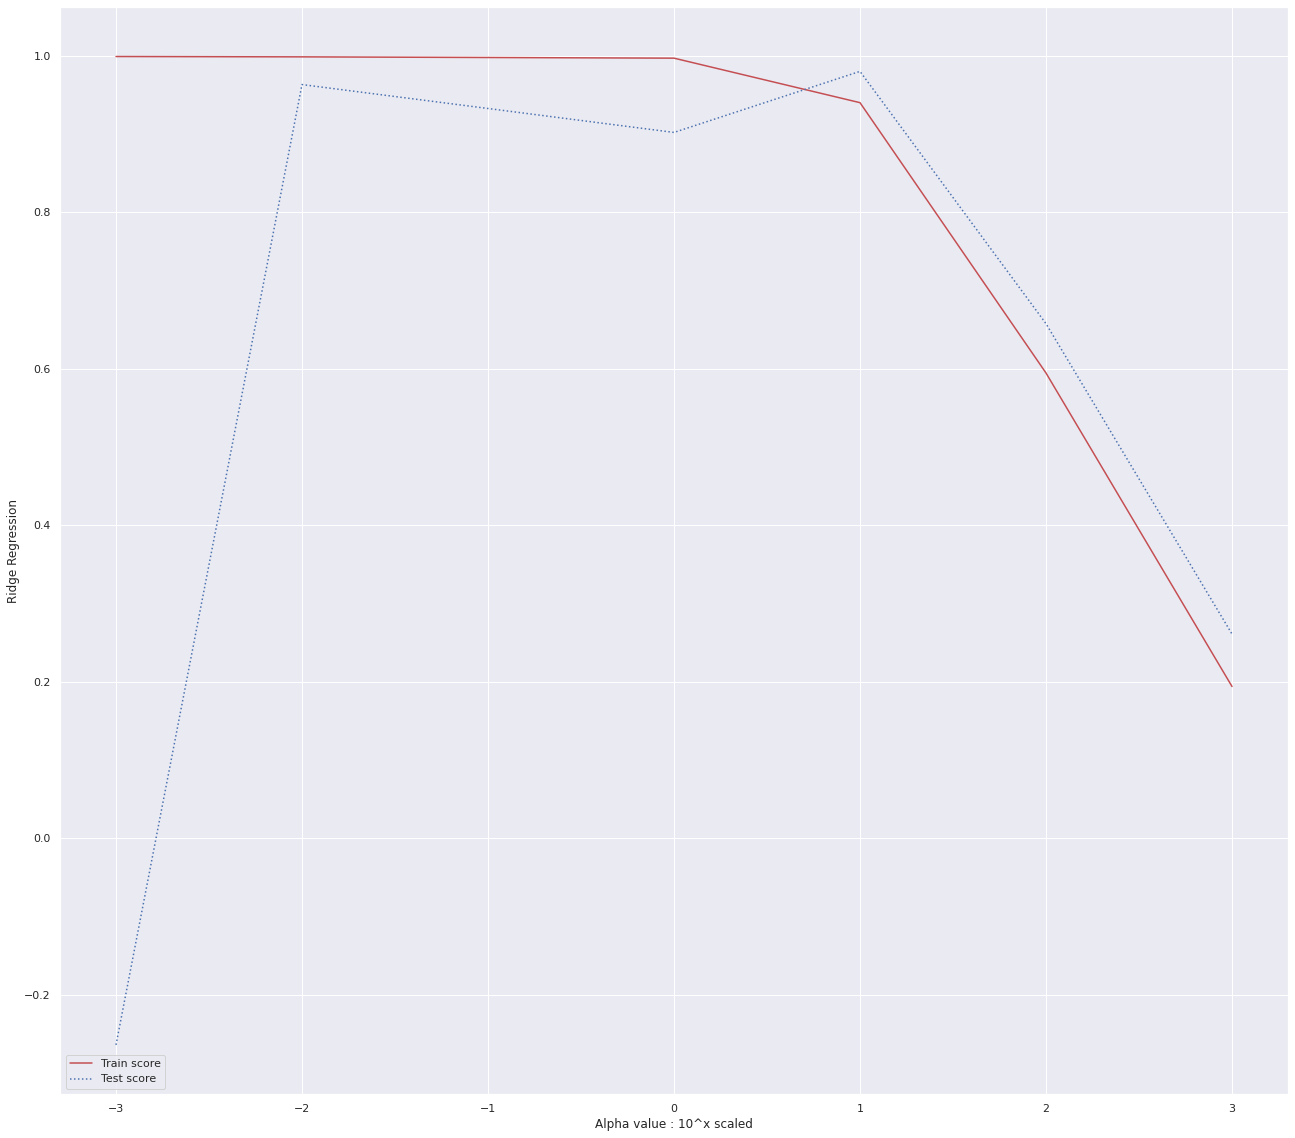

In [ ]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
alpha_values = [0.001, 0.01, 1, 10, 100, 1000]
for a in alpha_values:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, y_train_scaled)
  train_scores.append(ridge.score(train_scaled, y_train_scaled))
  test_scores.append(ridge.score(test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train score')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test score')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression')
plt.legend(loc="lower left")

In [ ]:
print(X_train.shape)

(309, 10)
